<a href="https://colab.research.google.com/github/piyushbnsal10/Udacity-Pytorch-Scholarship/blob/master/cifar_10_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np


train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
  print("Cuda is available")
else:
  print("Cuda not is available")


Cuda is available


In [0]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

batch_size=20
valid_size=0.2

transform=transforms.Compose([transforms.RandomHorizontalFlip(),transforms.RandomRotation(10),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data=datasets.CIFAR10('data',train=True,download=True,transform=transform)
test_data=datasets.CIFAR10('data',train=False,download=True,transform=transform)

num_train=len(train_data)
indices=list(range(num_train))
np.random.shuffle(indices)
split=int(np.floor(valid_size*num_train))
train_idx,valid_idx=indices[split:],indices[:split]

train_sampler=SubsetRandomSampler(train_idx)
valid_sampler=SubsetRandomSampler(valid_idx)

train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=train_sampler)
valid_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=valid_sampler)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=batch_size)

classes=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']


Files already downloaded and verified


(32, 32, 3)


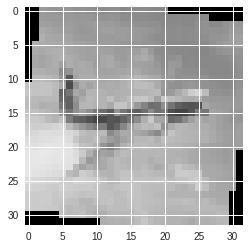

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

data=train_data[15000][0].numpy()
data=data*0.5+0.5
data=np.transpose(data,(1,2,0))

print(data.shape)
plt.imshow(data)

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(3,16,3,padding=1)
    self.conv2=nn.Conv2d(16,32,3,padding=1)
    self.conv3=nn.Conv2d(32,64,3,padding=1)
    self.dropout=nn.Dropout(0.25)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(64*4*4,500)
    self.fc2=nn.Linear(500,10)
    
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
  
    x=x.view(-1,64*4*4)
  
    x=self.dropout(x)
    x=F.relu(self.fc1(x))
    x=self.dropout(x)
    x=self.fc2(x)
    return x

model=Net()
print(model)
  
if train_on_gpu:
  model.cuda()
         

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout): Dropout(p=0.25)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [0]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [0]:
n_epochs=70

valid_loss_min=np.Inf
train_loss=0.0
valid_loss=0.0

for epoch in range(n_epochs):

  model.train()
  for batch_idx,(image,label) in enumerate(train_loader):
    if(train_on_gpu):
      image,label=image.cuda(),label.cuda()
     
    optimizer.zero_grad()
    output=model(image)
    loss=criterion(output,label)
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()*image.size(0)
    
  model.eval()

 
  
  for batch_idx,(image,label) in enumerate(train_loader):
    if(train_on_gpu):
      image,label=image.cuda(),label.cuda()
     
    optimizer.zero_grad()
    output=model(image)
    loss=criterion(output,label)
    loss.backward()
    optimizer.step()
    valid_loss+=loss.item()*image.size(0)
    
    
  train_loss=train_loss/len(train_loader.dataset)
  valid_loss=valid_loss/len(valid_loader.dataset)
  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
  if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_augmented.pt')
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 0.925850 	Validation Loss: 0.807239
Validation loss decreased (inf --> 0.807239).  Saving model ...
Epoch: 1 	Training Loss: 0.854013 	Validation Loss: 0.730603
Validation loss decreased (0.807239 --> 0.730603).  Saving model ...
Epoch: 2 	Training Loss: 0.793995 	Validation Loss: 0.673116
Validation loss decreased (0.730603 --> 0.673116).  Saving model ...
Epoch: 3 	Training Loss: 0.749019 	Validation Loss: 0.623719
Validation loss decreased (0.673116 --> 0.623719).  Saving model ...
Epoch: 4 	Training Loss: 0.711039 	Validation Loss: 0.577649
Validation loss decreased (0.623719 --> 0.577649).  Saving model ...
Epoch: 5 	Training Loss: 0.677349 	Validation Loss: 0.542667
Validation loss decreased (0.577649 --> 0.542667).  Saving model ...
Epoch: 6 	Training Loss: 0.641937 	Validation Loss: 0.507791
Validation loss decreased (0.542667 --> 0.507791).  Saving model ...
Epoch: 7 	Training Loss: 0.621284 	Validation Loss: 0.478932
Validation loss decreased (0.50779

In [0]:
model.load_state_dict(torch.load('model_augmented.pt'))

NameError: ignored